Here we will try to see what type of activity corelates most with low attention rates

In [66]:
import pandas as pd
import numpy as np
import os

In [50]:
def get_csv_data(path_logs, path_csv):
    data = pd.read_csv(path_csv, sep='\t')
    dfs = []
    for dirname, _, filenames in os.walk(path_logs):
        for filename in filenames:
            if filename.endswith('.csv'):
                file_path = os.path.join(dirname, filename).replace('\\', '/')
                df = pd.read_csv(file_path,sep=' ')
                
                row = data.loc[data['log_id'] == int(filename[:-4])] # https://stackoverflow.com/questions/17071871/how-do-i-select-rows-from-a-dataframe-based-on-column-values
                # print(row)
                arr = row.values.tolist()
                arr.append(df)
                dfs.append(arr)
    return dfs

In [51]:
dfs = get_csv_data('../the-attentive-cursor-dataset/logs', '../the-attentive-cursor-dataset/groundtruth.tsv')

In [63]:
print("Attention score : ",dfs[0][0][2])
print("log_id : ",dfs[0][0][3])
# print("actions dataframe : ",dfs[0][1])

Attention score :  5
log_id :  20161214224444


In [74]:
print("size of the dataset : ",len(dfs))

#count the number of values for each attention score
attention_scores = []
for i in range(len(dfs)):
    attention_scores.append(dfs[i][0][2])
count_attention_scores =np.bincount(attention_scores)

size of the dataset :  2909


<BarContainer object of 6 artists>

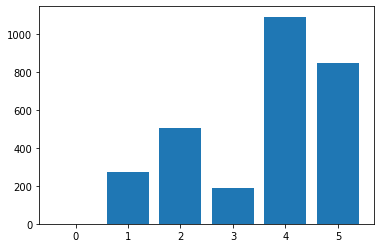

In [75]:
import matplotlib.pyplot as plt

#bar plot of attention score
plt.bar(range(len(count_attention_scores)), count_attention_scores)

In [77]:
print(dfs[0][1]['event'].value_counts())

scroll          61
mousemove       22
mouseover        9
mousedown        6
mouseup          5
blur             3
focus            3
click            2
load             1
contextmenu      1
beforeunload     1
unload           1
Name: event, dtype: int64


In [80]:
# sum_event_counts = pd.Series([])
for i in range(len(dfs)):
    sum_event_counts = sum_event_counts + dfs[i][1]['event'].value_counts()
print(sum_event_counts)

beforeunload   NaN
blur           NaN
click          NaN
contextmenu    NaN
copy           NaN
focus          NaN
keydown        NaN
keyup          NaN
load           NaN
mousedown      NaN
mousemove      NaN
mouseover      NaN
mouseup        NaN
resize         NaN
scroll         NaN
select         NaN
touchend       NaN
touchmove      NaN
touchstart     NaN
unload         NaN
dtype: float64
